In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#criando a base de dados
data = pd.DataFrame({
    'consumo de energia': [1000, 3000, 1500, 2500, 1200, 3500],
    'tempo de operacao':[200, 500, 300, 400, 250, 600],
    'tipo de energia':['eletrica', 'gas', 'eletrica', 'gas', 'eletrica', 'gas'],
    'classifi': ['eficiente', 'ineficiente', 'eficiente', 'ineficiente', 'eficiente', 'ineficiente']
})

In [3]:
# Convertendo as variáveis categóricas em numéricas
label_encoder = LabelEncoder()

# Aplicando o LabelEncoder às colunas categóricas
data['tipo de energia'] = label_encoder.fit_transform(data['tipo de energia'])
data['classifi'] = label_encoder.fit_transform(data['classifi'])

In [4]:
# Preparando os dados (com múltiplas variáveis)
x = np.array(data[['consumo de energia', 'tempo de operacao', 'tipo de energia']])
y = np.array(data['classifi'])

In [5]:
# Dividindo os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# Treinando o modelo de árvore de decisão
model = DecisionTreeClassifier()
model.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [8]:
# Fazendo previsões
prev = model.predict(x_teste)

In [9]:
# Calculando a acurácia
accuracy = accuracy_score(y_teste, prev)

In [10]:
# Matriz de confusão
matrix = confusion_matrix(y_teste, prev)

In [11]:
print(f'Acurácia: {accuracy}')
print(f'Matriz de Confusão: \n{matrix}')

Acurácia: 1.0
Matriz de Confusão: 
[[1 0]
 [0 1]]


In [12]:
# Nome das classes originais para o plot
class_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

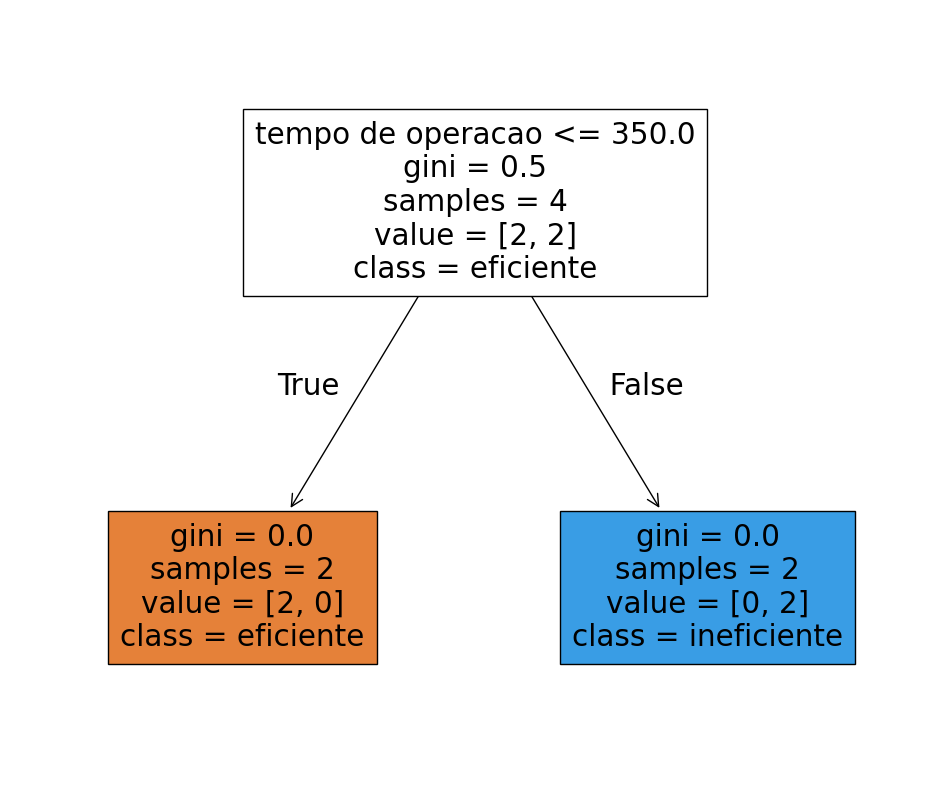

In [13]:
# Plotando a árvore de decisão
fig = plt.figure(figsize=(12,10))
tree.plot_tree(model, 
               feature_names=['consumo de energia', 'tempo de operacao', 'tipo de energia'], 
               class_names=class_names, 
               filled=True)
plt.show()